In [1]:
#Import required Python packages
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
#Import sample data
my_df = pd.read_csv("sample_data_clustering.csv")

In [3]:
my_df

,var1,var2
0,0.528827,0.919833
1,0.715373,0.133577
2,0.686088,0.824129
3,0.214553,0.609016
4,0.202000,0.486103
...,...,...
295,0.462960,0.791974
296,0.326000,0.715142
297,0.718920,0.149854
298,0.544617,0.732966


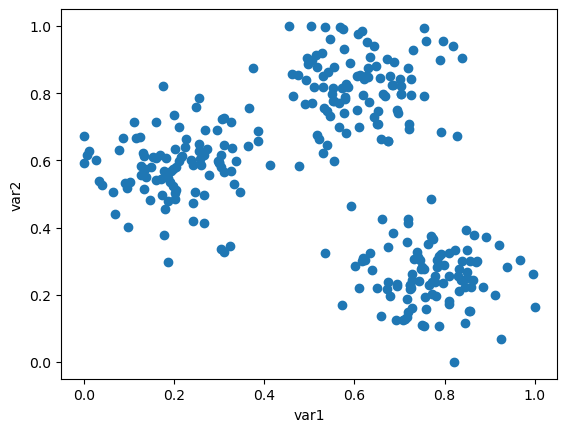

In [4]:
#Plot the data
plt.scatter(my_df["var1"], my_df["var2"])
plt.xlabel("var1")
plt.ylabel("var2")
plt.show()

In [5]:
#Instantiate and fit the model
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(my_df)

C:\Users\19144\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19144\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [6]:
#Algorithm has randomly placed three random centroids (n_clusters)
#Based on those distances, assigned data points to each centroid
#This is repeated until no data points switch allegiances between clusters 


In [8]:
#Add the cluster labels to our df
my_df["cluster"] = kmeans.labels_

In [9]:
my_df

,var1,var2,cluster
0,0.528827,0.919833,0
1,0.715373,0.133577,2
2,0.686088,0.824129,0
3,0.214553,0.609016,1
4,0.202000,0.486103,1
...,...,...,...
295,0.462960,0.791974,0
296,0.326000,0.715142,1
297,0.718920,0.149854,2
298,0.544617,0.732966,0


In [10]:
my_df["cluster"].value_counts()

cluster
0    100
2    100
1    100
Name: count, dtype: int64

In [11]:
#There is a nice split across all clusters

In [12]:
centroids = kmeans.cluster_centers_
print(centroids)
#Locations of centroids (var1, var2)

[[0.61145409 0.82340359]
 [0.20990899 0.58086933]
 [0.76730971 0.25649517]]


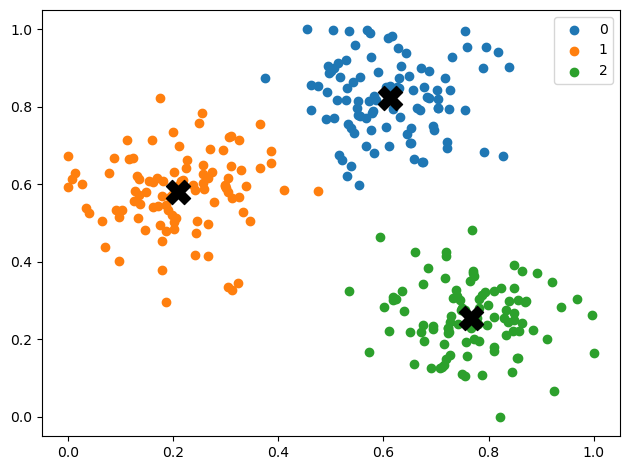

In [21]:
#Plot our clusters and centroids
clusters = my_df.groupby("cluster")

for cluster, data in clusters:
    plt.scatter(data["var1"],data["var2"], marker = "o", label = cluster)
    plt.scatter(centroids[cluster,0], centroids[cluster,1], marker = "X", color = "black", s = 300)
plt.legend()
plt.tight_layout()
plt.show()